In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

# Model Build

In [2]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

Preparing our data

In [3]:
from keras.applications.vgg16 import preprocess_input

In [4]:
def preprocessingImages1(path):

  """
  input : Path
  output: Pre processed images
  """

  image_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,# rescale=1/255 in case of self model
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

  image = image_datagen.flow_from_directory(
      directory = path,  # this is the target directory
      target_size=(224, 224),
      batch_size=32,
      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

  return image


In [5]:
path = "train"
train_data = preprocessingImages1(path)

Found 1006 images belonging to 2 classes.


In [6]:
def preprocessingImages2(path):

  """
  input : Path
  output: Pre processed images
  """

  image_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)# rescale=1/255 in case of self model

  image = image_datagen.flow_from_directory(
      directory = path,  # this is the target directory
      target_size=(224, 224),
      batch_size=32,
      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

  return image

In [7]:
path = "test"
test_data = preprocessingImages2(path)

Found 58 images belonging to 2 classes.


In [8]:
path = "val"
val_data = preprocessingImages2(path)

Found 360 images belonging to 2 classes.


## MODEL TRAINING Prebuilt

In [9]:
import numpy as np
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.vgg16 import VGG16

In [10]:
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [11]:
for layer in base_model.layers:
  layer_trainable = False


In [12]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)


model = Model(base_model.input, X)

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 14,739,777 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(keras.optimizers.Adam(learning_rate=0.0001), 
              loss= keras.losses.binary_crossentropy, 
              metrics=['accuracy'])

In [15]:
#Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=8, verbose=1, mode="auto")

#Model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./VGG16.keras", verbose=1, save_best_only=True, mode="auto")

cd = [ mc]

Model Training

In [16]:
batch_size = 32

In [17]:
hs = model.fit(x = train_data,
                steps_per_epoch=len(train_data)//batch_size,
                epochs = 40,
                verbose=1,
                validation_data = val_data,
                validation_steps = len(val_data)//batch_size,
                callbacks=cd)

Epoch 1/40


C:\Users\kumar\Desktop\Image_Processing_Projectexhibition\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52s/step - accuracy: 0.5000 - loss: 2.1776
Epoch 1: val_accuracy improved from -inf to 0.56111, saving model to ./VGG16.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 135s 135s/step - accuracy: 0.5000 - loss: 2.1776 - val_accuracy: 0.5611 - val_loss: 2.3244
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - accuracy: 0.5312 - loss: 1.9395
Epoch 2: val_accuracy did not improve from 0.56111
1/1 ━━━━━━━━━━━━━━━━━━━━ 103s 103s/step - accuracy: 0.5312 - loss: 1.9395 - val_accuracy: 0.5028 - val_loss: 6.9227
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28s/step - accuracy: 0.5000 - loss: 6.1729
Epoch 3: val_accuracy did not improve from 0.56111
1/1 ━━━━━━━━━━━━━━━━━━━━ 102s 102s/step - accuracy: 0.5000 - loss: 6.1729 - val_accuracy: 0.5056 - val_loss: 3.4465
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28s/step - accuracy: 0.3750 - loss: 4.6133
Epoch 4: val_accuracy did not improve from 0.56111
1/1 ━━━━━━━━━━━━━━━━━━━━ 104s 104s/step - accuracy: 0.3750 - loss: 4.6133 - val_accuracy: 0.5472 - 

Epoch 26/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.7812 - loss: 0.5380
Epoch 26: val_accuracy did not improve from 0.69722
1/1 ━━━━━━━━━━━━━━━━━━━━ 93s 93s/step - accuracy: 0.7812 - loss: 0.5380 - val_accuracy: 0.6889 - val_loss: 0.5900
Epoch 27/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.6250 - loss: 0.6003
Epoch 27: val_accuracy did not improve from 0.69722
1/1 ━━━━━━━━━━━━━━━━━━━━ 92s 92s/step - accuracy: 0.6250 - loss: 0.6003 - val_accuracy: 0.6667 - val_loss: 0.5960
Epoch 28/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.7500 - loss: 0.5958
Epoch 28: val_accuracy did not improve from 0.69722
1/1 ━━━━━━━━━━━━━━━━━━━━ 95s 95s/step - accuracy: 0.7500 - loss: 0.5958 - val_accuracy: 0.6722 - val_loss: 0.5934
Epoch 29/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32s/step - accuracy: 0.7188 - loss: 0.5835
Epoch 29: val_accuracy did not improve from 0.69722
1/1 ━━━━━━━━━━━━━━━━━━━━ 81s 81s/step - accuracy: 0.7188 - loss: 0.5835 - val_accuracy: 0.6583 - val_loss: 0.5883
Epoc

C:\Users\kumar\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 33: val_accuracy did not improve from 0.70556
1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6750 - val_loss: 0.5609
Epoch 34/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27s/step - accuracy: 0.7812 - loss: 0.4781
Epoch 34: val_accuracy did not improve from 0.70556
1/1 ━━━━━━━━━━━━━━━━━━━━ 73s 73s/step - accuracy: 0.7812 - loss: 0.4781 - val_accuracy: 0.5806 - val_loss: 0.6402
Epoch 35/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.5312 - loss: 0.6782
Epoch 35: val_accuracy did not improve from 0.70556
1/1 ━━━━━━━━━━━━━━━━━━━━ 75s 75s/step - accuracy: 0.5312 - loss: 0.6782 - val_accuracy: 0.6861 - val_loss: 0.5405
Epoch 36/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.6875 - loss: 0.5346
Epoch 36: val_accuracy did not improve from 0.70556
1/1 ━━━━━━━━━━━━━━━━━━━━ 68s 68s/step - accuracy: 0.6875 - loss: 0.5346 - val_accuracy: 0.6694 - val_loss: 0.5591
Epoch 37/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.6562 - loss: 0.

Graphical Interpretation

In [18]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'acc vs val-acc')

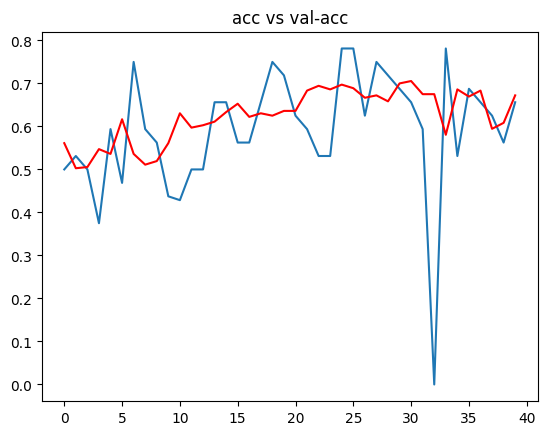

In [19]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("acc vs val-acc")

Text(0.5, 1.0, 'loss vs val-loss')

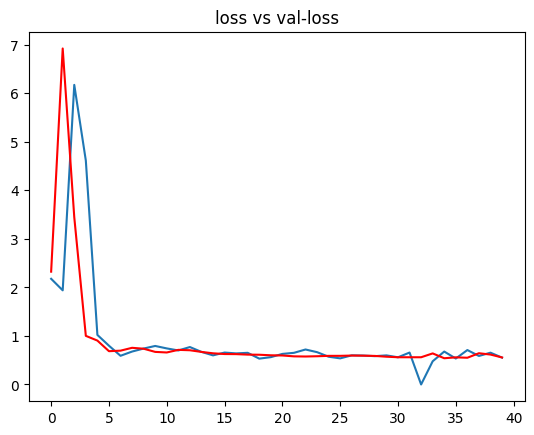

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")

plt.title("loss vs val-loss")

In [21]:
#Model Accuracy

from keras.models import load_model

model = load_model("./VGG16.keras")

**Model Accuracy**

In [22]:
acc = model.evaluate(test_data)[1]

print(f"the accuracy of our model is {acc*100} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7349 - loss: 0.5736
the accuracy of our model is 75.86206793785095 %


In [24]:
train_data.class_indices

{'CVD': 0, 'NotCVD': 1}

In [25]:
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predictions:
[[0.42174262]]


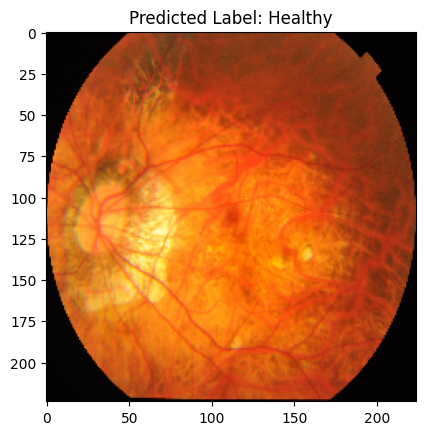

In [52]:
path = "./test/NotCVD/1ffa94f3-8d87-11e8-9daf-6045cb817f5b..JPG"
img = image.load_img(path, target_size = (224, 224))

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

plt.imshow(img)

predictions = model.predict(input_arr)
predictions

# Print the predictions
print("Predictions:")
print(predictions)
# Get the predicted label
predicted_label = "Healthy" if predictions < 0.4498 else "Cardiovascular Disease"



plt.title("Predicted Label: " + predicted_label)
plt.show()